# 📑 Evaluación de WhyXrayCLIP en ROCO

Este notebook replica el flujo ISA con **WhyXrayCLIP ViT-L/14** sobre radiografías de tórax filtradas del dataset **ROCO**.

Modelo actual: **WhyXrayCLIP (ViT-L/14)**
Dataset: **ROCO (Radiology Objects in COntext)** filtrado a captions `chest x-ray|lung`
Tarea: **ISA (Image-Sentence Alignment)**
---



## Clonar repositorio

In [6]:
# 📌 Código
REPO_URL  = "https://github.com/Alberto-97sc/mmshap_medclip.git"
LOCAL_DIR = "/content/mmshap_medclip"
BRANCH    = "main"

%cd /content
import os, shutil, subprocess, sys

if not os.path.isdir(f"{LOCAL_DIR}/.git"):
    # No está clonado aún
    !git clone $REPO_URL $LOCAL_DIR
else:
    # Ya existe: actualiza a la última versión del remoto
    %cd $LOCAL_DIR
    !git fetch origin
    !git checkout $BRANCH
    !git reset --hard origin/$BRANCH
%cd $LOCAL_DIR
!git rev-parse --short HEAD

/content
Cloning into '/content/mmshap_medclip'...
remote: Enumerating objects: 111, done.
remote: Counting objects: 100% (44/44), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 111 (delta 22), reused 27 (delta 18), pack-reused 67 (from 1)
Receiving objects: 100% (111/111), 448.92 KiB | 1.96 MiB/s, done.
Resolving deltas: 100% (40/40), done.
/content/mmshap_medclip
d7d00ef


## Instalar dependencias y montar google drive

In [1]:
from google.colab import drive; drive.mount('/content/drive')

# === Instalar en modo editable (pyproject.toml) ===
%pip install -e /content/mmshap_medclip

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Obtaining file:///content/mmshap_medclip
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for mmshap_medclip (pyproject.toml) ... done
  Created wheel for mmshap_medclip: filename=mmshap_medclip-0.1.0-0.editable-py3-none-any.whl size=3906 sha256=71759c70f88b974d8f784f7fd4450c8880c332d2c58286acd224bb3162b45afb
  Stored in directory: /tmp/pip-ephem-wheel-cache-azjfprhi/wheels/b3/1d/7e/d38403be6961da2a3fb9229d1eb25770838e383069b89a1567
Successfully built mmshap_medclip
  Attempting uninstall: mmshap_medclip
    Found existing installation: mmshap_medclip 0.1.0
    Uninstalling mmshap_medclip-0.1.0:
      Successfully uninstalled mmshap_medclip-0.1.0


In [ ]:
# 📌 Código
from google.colab import drive; drive.mount('/content/drive')

## Cargar modelos y datos

In [2]:
# 📌 Código
CFG_PATH="/content/mmshap_medclip/configs/roco_isa_whyxrayclip.yaml"

# Asegura que cfg, device, dataset y model estén listos en esta sesión
if not all(k in globals() for k in ("cfg", "device", "dataset", "model")):
    from mmshap_medclip.io_utils import load_config
    from mmshap_medclip.devices import get_device
    from mmshap_medclip.registry import build_dataset, build_model

    cfg = load_config(CFG_PATH)
    device  = get_device()
    dataset = build_dataset(cfg["dataset"])
    model   = build_model(cfg["model"], device=device)

print("OK → len(dataset) =", len(dataset), "| device =", device)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/605M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/568 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

OK → len(dataset) = 8180 | device = cuda


## Ejecutar SHAP en una muestra

logit=32.7188  TScore=60.49%  IScore=39.51%


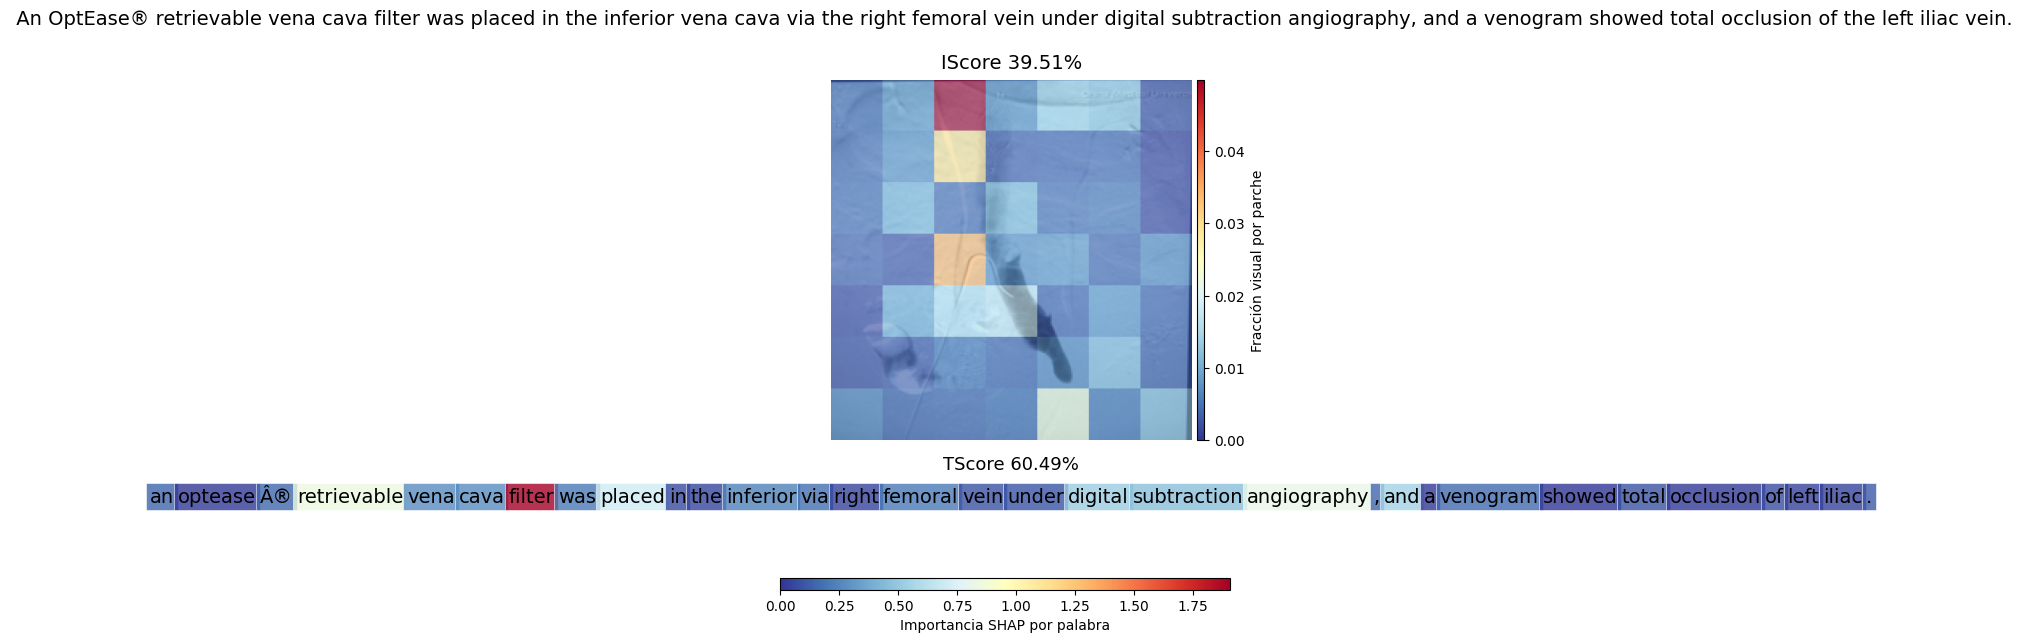

In [3]:
# 📌 Código
from mmshap_medclip.tasks.isa import run_isa_one

muestra = 154
sample  = dataset[muestra]
image, caption = sample['image'], sample['text']

res = run_isa_one(model, image, caption, device, explain=True, plot=True)
print(f"logit={res['logit']:.4f}  TScore={res['tscore']:.2%}  IScore={res['iscore']:.2%}")



In [ ]:
# ==== WhyXrayCLIP + ROCO filtrado (mini pipeline) ====
import random
from IPython.display import display

assert 'dataset' in globals() and 'model' in globals() and 'device' in globals(), 'Ejecuta las celdas previas primero.'
random.seed(42)
idx = random.randrange(len(dataset))
sample = dataset[idx]
image, caption, meta = sample['image'], sample['text'], sample['meta']

print(f'Índice seleccionado: {idx}')
print(f"Nombre en CSV: {meta.get("filename")} | Ruta ZIP: {meta.get("zip_path")}")
print('Caption original:')
print(caption)
display(image)

from mmshap_medclip.tasks.isa import run_isa_one
res = run_isa_one(model, image, caption, device, explain=True, plot=True)
print(f"logit={res['logit']:.4f}  TScore={res['tscore']:.2%}  IScore={res['iscore']:.2%}")
fig = res.get('fig')
if fig is not None:
    display(fig)
